In [ ]:
!pip install -Uqq ipdb
import ipdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.3/793.3 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython~=7.9.0, but you have ipython 8.11.0 which is incompatible.


In [ ]:
%pdb on


Automatic pdb calling has been turned ON


#Deep Learning Project - Algorithms for Massive Data
#####By Giuseppe Scaffidi Caruso and Andrew Thomas Costa

In [ ]:
import pandas as pd
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import time
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
sns.set_style('darkgrid')
import shutil
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import time
from tqdm import tqdm
from sklearn.metrics import f1_score
from IPython.display import YouTubeVideo
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
print ('Modules loaded')
from google.colab import files
import os
import json
import getpass
from PIL import Image


Modules loaded


###File Set-up

In [ ]:
from google.colab import files
import os
import json
import getpass

# Prompt the user for input
print('If you have you kaggle Json, upload it on the repositiory (y) otherwise insert your Kaggle Credentials (n')
use_upload = input('Do you want to upload the Kaggle credentials file? (y/n): ')
if use_upload.lower() == 'y':
    # Upload the file
    uploaded = files.upload()

    # Rename the file to KaggleCredential.json
    for name in uploaded.keys():
        if 'kaggle' in name.lower():
            os.rename(name, 'KaggleCredential.json')
            break
else:
    # Manually input the credentials
    username = input('Enter your Kaggle username: ')
    password = getpass.getpass('Enter your Kaggle key: ')

    # Save the credentials to a JSON file
    credentials = {'username': username, 'key': password}
    with open('KaggleCredential.json', 'w') as f:
        json.dump(credentials, f)

# Load the credentials from the JSON file
with open('KaggleCredential.json', 'r') as f:
    credentials = json.load(f)

# Get the Kaggle username from the credentials
username = credentials['username']
password = credentials['key']


Do you want to upload the Kaggle credentials file? (y/n): n
Enter your Kaggle username: andrewcosta
Enter your Kaggle key: ··········


###Download Data

In [ ]:

# Save your credentials to a JSON file
credentials = {'username': username, 'key': password}
kaggle_dir = '/root/.kaggle'
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)
with open(os.path.join(kaggle_dir, 'kaggle.json'), 'w') as f:
    json.dump(credentials, f)

# Set the file permissions to read/write only for the owner
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
import kaggle
import zipfile
import pandas as pd

In [ ]:
datasets = !kaggle datasets list -s "Plant Leaves image classification"
datasets

['ref                                                         title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  ',
 '----------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  ',
 'csafrit2/plant-leaves-for-image-classification              Plant Leaves for Image Classification          7GB  2022-09-12 03:16:00            683         26  0.875            ',
 'vbookshelf/rice-leaf-diseases                               Rice Leaf Diseases Dataset                    37MB  2020-02-21 01:35:02           7115        128  0.625            ',
 'sadmansakibmahi/plant-disease-expert                        Plant Disease Expert                           6GB  2023-02-28 18:13:28            731         30  0.75             ',
 'rizwan123456789/potato-disease-leaf-datasetpld               Potato Disease Leaf Dataset(PLD)

In [ ]:
dataset = datasets[2].split()[0]
dataset

'csafrit2/plant-leaves-for-image-classification'

In [ ]:
%%time
# Import necessary libraries
import kaggle
import zipfile

# Authenticate Kaggle API
kaggle.api.authenticate()

# Download the dataset
kaggle.api.dataset_download_files('csafrit2/plant-leaves-for-image-classification')

# Extract the zip file to the current working directory (i.e., the root directory in Colab)
with zipfile.ZipFile('plant-leaves-for-image-classification.zip', 'r') as zip_ref:
    zip_ref.extractall()  # Extract to the current directory


CPU times: user 57.2 s, sys: 17.8 s, total: 1min 15s
Wall time: 1min 33s


In [ ]:
cfg_path = os.getcwd() #/content
root_dir = '/content/drive/'
input_path_train=  "destination_folder/split/train"
input_path_valid= "destination_folder/split/val"
input_path_test= "destination_folder/split/test"
input_path_imagestopredict= "input/data/images_to_predict"
train_path = os.path.join(cfg_path,input_path_train)
val_path = os.path.join(cfg_path,input_path_valid)
test_path = os.path.join(cfg_path,input_path_test)

train_path


'/content/destination_folder/split/train'

###DATA VISUALIZATION

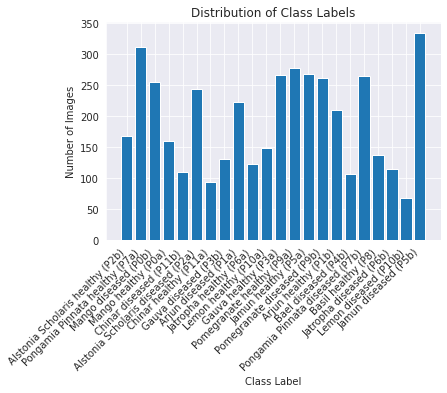

In [ ]:
import os
import matplotlib.pyplot as plt

path_plot = '/content/Plants_2/train'
# Define path to dataset directory
dataset_dir = path_plot

# Get list of subdirectories in dataset directory
subdirs = os.listdir(dataset_dir)

# Initialize dictionary to store number of images in each class
class_counts = {}

# Loop over subdirectories and count number of images in each class
for subdir in subdirs:
    class_counts[subdir] = len(os.listdir(os.path.join(dataset_dir, subdir)))

# Plot bar chart of class counts with rotated x-axis labels
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Class Labels')
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.show()


In [ ]:
len(os.listdir('/content/destination_folder/split/train/diseased/Alstonia Scholaris diseased (P2a)'))

244

### BINARY MODEL 


In [ ]:
import shutil
import os

_LABEL_MAPPING_HEALTHY = [
    ("P0a", "Mango (P0) healthy"),
    ("P1b", "Arjun (P1) healthy"),
    ("P2b", "Alstonia Scholaris (P2) healthy"),
    ("P3a", "Gauva (P3) healthy"),
    ("P5a", "Jamun (P5) healthy"),
    ("P6a", "Jatropha (P6) healthy"),
    ("P7a", "Pongamia Pinnata (P7) healthy"),
    ("P8", "Basil (P8) healthy"),
    ("P9a", "Pomegranate (P9) healthy"),
    ("P10a", "Lemon (P10) healthy"),
    ("P11a", "Chinar (P11) healthy")]

_LABEL_MAPPING_DISEASED=[
    ("P0b", "Mango (P0) diseased"),
    ("P1a", "Arjun (P1) diseased"),
    ("P2a", "Alstonia Scholaris (P2) diseased"),
    ("P3b", "Gauva (P3) diseased"),
    ("P4b", "Bael (P4) diseased"),
    ("P5b", "Jamun (P5) diseased"),
    ("P6b", "Jatropha (P6) diseased"),
    ("P7b", "Pongamia Pinnata (P7) diseased"),
    ("P9b", "Pomegranate (P9) diseased"),
    ("P10b", "Lemon (P10) diseased"),
    ("P11b", "Chinar (P11) diseased")
]

src_dir = '/content/Plants_2/train'
dst_dir = '/content/destination_folder/split'

# Create the destination directories if they don't exist
for split in ['train', 'val','test']:
    for label in ['healthy', 'diseased']:
        os.makedirs(os.path.join(dst_dir, split, label), exist_ok=True)


#TRAIN 
src_dir_train = '/content/Plants_2/train'
dst_dir = '/content/destination_folder/split'
for filename in os.listdir(src_dir):
    subfolder_name = filename
    source_subfolder = os.path.join(src_dir_train, subfolder_name)
    destination_subfolder = os.path.join(dst_dir, 'train')
    s = filename
    label = s.split('(')[-1].strip(')')
    if label in [code for code, name in _LABEL_MAPPING_HEALTHY]:
       shutil.copytree(source_subfolder, os.path.join(destination_subfolder, 'healthy', subfolder_name))
    elif label in [code for code, name in _LABEL_MAPPING_DISEASED]:
      shutil.copytree(source_subfolder, os.path.join(destination_subfolder, 'diseased', subfolder_name))


#VALIDATION
src_dir_valid = '/content/Plants_2/valid'
dst_dir = '/content/destination_folder/split'
for filename in os.listdir(src_dir):
    subfolder_name = filename
    source_subfolder = os.path.join(src_dir_valid, subfolder_name)
    destination_subfolder = os.path.join(dst_dir, 'val')
    s = filename
    label = s.split('(')[-1].strip(')')
    if label in [code for code, name in _LABEL_MAPPING_HEALTHY]:
       shutil.copytree(source_subfolder, os.path.join(destination_subfolder, 'healthy', subfolder_name))
    elif label in [code for code, name in _LABEL_MAPPING_DISEASED]:
      shutil.copytree(source_subfolder, os.path.join(destination_subfolder, 'diseased', subfolder_name))


#TEST
src_dir_test = '/content/Plants_2/test'
dst_dir = '/content/destination_folder/split'
for filename in os.listdir(src_dir):
    subfolder_name = filename
    source_subfolder = os.path.join(src_dir_test, subfolder_name)
    destination_subfolder = os.path.join(dst_dir, 'test')
    s = filename
    label = s.split('(')[-1].strip(')')
    if label in [code for code, name in _LABEL_MAPPING_HEALTHY]:
       shutil.copytree(source_subfolder, os.path.join(destination_subfolder, 'healthy', subfolder_name))
    elif label in [code for code, name in _LABEL_MAPPING_DISEASED]:
      shutil.copytree(source_subfolder, os.path.join(destination_subfolder, 'diseased', subfolder_name))


          

  

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
HEIGHT = 64
WIDTH = 64
BATCH = 50


In [ ]:
train = tf.keras.utils.image_dataset_from_directory(
                                  train_path,
                                  image_size=(HEIGHT,WIDTH), 
                                  interpolation="mitchellcubic",
                                  crop_to_aspect_ratio=True,
                                  seed=42, 
                                  shuffle=True, 
                                  batch_size=BATCH
                                  )

val = tf.keras.utils.image_dataset_from_directory(
                                  val_path,
                                  image_size=(HEIGHT,WIDTH), 
                                  interpolation="mitchellcubic",
                                  crop_to_aspect_ratio=True,
                                  seed=42, 
                                  shuffle=True, 
                                  batch_size=BATCH
                                  )

test = tf.keras.utils.image_dataset_from_directory(
                                  test_path,
                                  image_size=(HEIGHT,WIDTH), 
                                  interpolation="mitchellcubic",
                                  crop_to_aspect_ratio=True,
                                  seed=42, 
                                  shuffle=True, 
                                  batch_size=BATCH
                                  )

Found 4274 files belonging to 2 classes.
Found 110 files belonging to 2 classes.
Found 110 files belonging to 2 classes.


In [ ]:
class_names = train.class_names

# Display 3 images from the train dataset 
plt.figure(figsize=(8, 8))
for images, labels in train.take(1):
    for i in range(3):
        ax = plt.subplot(1, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        # Use the label value (0 or 1) instead of class names
        plt.title(str(labels[i].numpy()))
        
        plt.axis("off")
plt.show()

In [ ]:
data_train = train.map(lambda x,y: (x/255, y))
data_val = val.map(lambda x,y: (x/255, y))
data_test = test.map(lambda x,y: (x/255, y))


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten


In [ ]:
train_aug = Sequential([
        Rescaling(scale=1.0 / 255),
        layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        layers.experimental.preprocessing.RandomZoom(
                height_factor=(-0.05, -0.15),
                width_factor=(-0.05, -0.15),
                fill_mode='nearest'
            )
])

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = val.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD

def base_model():
  model = Sequential() 
  model.add(train_aug)
  model.add(Conv2D(16, (5,5), activation='sigmoid', input_shape=(256,256,3)))
  model.add(MaxPooling2D())
  model.add(Conv2D(32, (5,5), activation='relu'))
  model.add(MaxPooling2D())
  model.add(Conv2D(64, (5,5), activation='sigmoid'))
  model.add(MaxPooling2D())
  model.add(Flatten())
  model.add(Dense(128, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation='sigmoid'))

  
  sgd = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])


  # Add early stopping callback

  
  return model
 

In [ ]:
b_model_1 = base_model()

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)
prime_history = b_model_1.fit(train_data, epochs=15, validation_data=val_data, callbacks=[early_stop])

Epoch 1/15


86/86 [==============================] - 17s 159ms/step - loss: 0.9334 - accuracy: 0.5028 - val_loss: 0.9140 - val_accuracy: 0.5000
Epoch 2/15
86/86 [==============================] - 14s 157ms/step - loss: 0.9255 - accuracy: 0.4951 - val_loss: 0.9147 - val_accuracy: 0.5000
Epoch 3/15
86/86 [==============================] - 14s 161ms/step - loss: 0.9089 - accuracy: 0.5171 - val_loss: 0.9259 - val_accuracy: 0.5000
Epoch 4/15
86/86 [==============================] - 14s 158ms/step - loss: 0.9122 - accuracy: 0.4771 - val_loss: 0.8928 - val_accuracy: 0.5000
Epoch 5/15
86/86 [==============================] - 14s 158ms/step - loss: 0.8926 - accuracy: 0.4974 - val_loss: 0.8878 - val_accuracy: 0.5000
Epoch 6/15
86/86 [==============================] - 14s 158ms/step - loss: 0.8869 - accuracy: 0.5037 - val_loss: 0.8858 - val_accuracy: 0.5000
Epoch 7/15
86/86 [==============================] - 13s 157ms/step - loss: 0.8799 - accuracy: 0.4920 - val_loss: 0.8737 - val_accuracy: 0.5000
Epoch 8/15

In [ ]:
def second_model():
  model = Sequential() 
  model.add(train_aug)
  model.add(Conv2D(32, (7,7), activation='elu', input_shape=(HEIGHT,WIDTH,3)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(Conv2D(64, (7,7), activation='elu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(Conv2D(128, (7,7), activation='elu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(Flatten())
  model.add(Dense(256, activation='elu'))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='elu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer=Adam(learning_rate=0.0001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

  return model 




In [ ]:
second_model = second_model()

In [ ]:
%%time


EPOCHS = 15
second_history = second_model.fit(data_train,#train_data
                           validation_data = data_val, #val_data
                           epochs = EPOCHS)

Epoch 1/15


86/86 [==============================] - 68s 649ms/step - loss: 0.7551 - accuracy: 0.6394 - val_loss: 0.7050 - val_accuracy: 0.5000
Epoch 2/15
86/86 [==============================] - 64s 677ms/step - loss: 0.6393 - accuracy: 0.7045 - val_loss: 0.7505 - val_accuracy: 0.5000
Epoch 3/15
86/86 [==============================] - 64s 679ms/step - loss: 0.5990 - accuracy: 0.7143 - val_loss: 0.8348 - val_accuracy: 0.5000
Epoch 4/15
86/86 [==============================] - 64s 681ms/step - loss: 0.5565 - accuracy: 0.7370 - val_loss: 0.8935 - val_accuracy: 0.5000
Epoch 5/15
86/86 [==============================] - 64s 678ms/step - loss: 0.5459 - accuracy: 0.7408 - val_loss: 0.9762 - val_accuracy: 0.5000
Epoch 6/15
86/86 [==============================] - 64s 680ms/step - loss: 0.5260 - accuracy: 0.7475 - val_loss: 0.6399 - val_accuracy: 0.6000
Epoch 7/15
86/86 [==============================] - 64s 677ms/step - loss: 0.5070 - accuracy: 0.7656 - val_loss: 0.9183 - val_accuracy: 0.5000
Epoch 8/15

###***PLOT BINARY 2nd trial***

In [ ]:
import matplotlib.pyplot as plt

def tr_plot(tr_data, start_epoch):
    tacc = tr_data.history['accuracy']
    tloss = tr_data.history['loss']
    vacc = tr_data.history['val_accuracy']
    vloss = tr_data.history['val_loss']
    epoch_count = len(tacc) + start_epoch
    epochs = list(range(start_epoch+1, epoch_count+1))
    index_loss = vloss.index(min(vloss))
    val_lowest = vloss[index_loss]
    index_acc = vacc.index(max(vacc))
    acc_highest = vacc[index_acc]
    fig,axes = plt.subplots(1, 2, figsize=(20, 5))
    axes[0].plot(epochs, tloss, 'r', label='Training loss')
    axes[0].plot(epochs, vloss, 'g', label='Validation loss')
    axes[0].scatter(index_loss+1, val_lowest, s=150, c='blue', label=f'Best epoch={index_loss+1+start_epoch}')
    axes[0].scatter(epochs, tloss, s=100, c='red')
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot(epochs, tacc, 'r', label='Training accuracy')
    axes[1].plot(epochs, vacc, 'g', label='Validation accuracy')
    axes[1].scatter(index_acc+1, acc_highest, s=150, c='blue', label=f'Best epoch={index_acc+1+start_epoch}')
    axes[1].scatter(epochs, tacc, s=100, c='red')
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout()
    plt.show()
    return index_loss+start_epoch


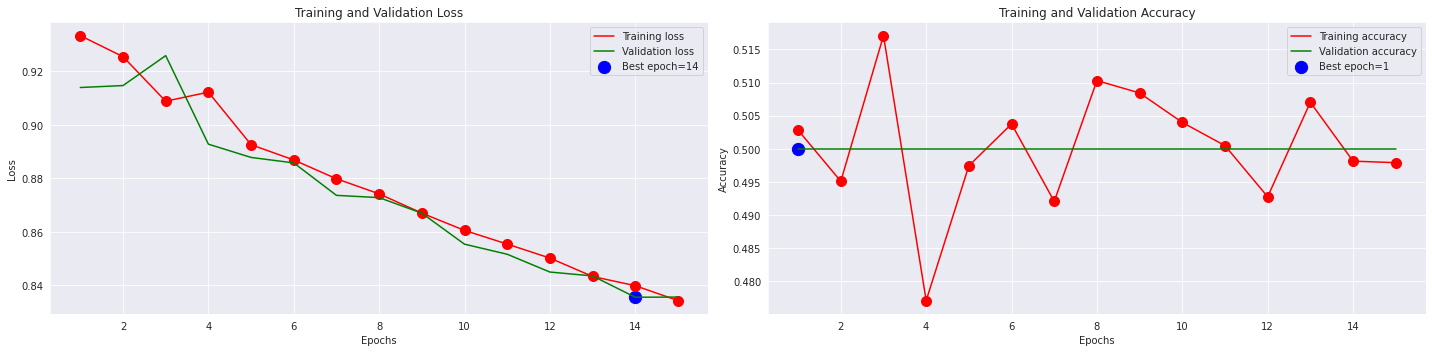

13

In [ ]:
tr_plot(prime_history, 0) #first model 

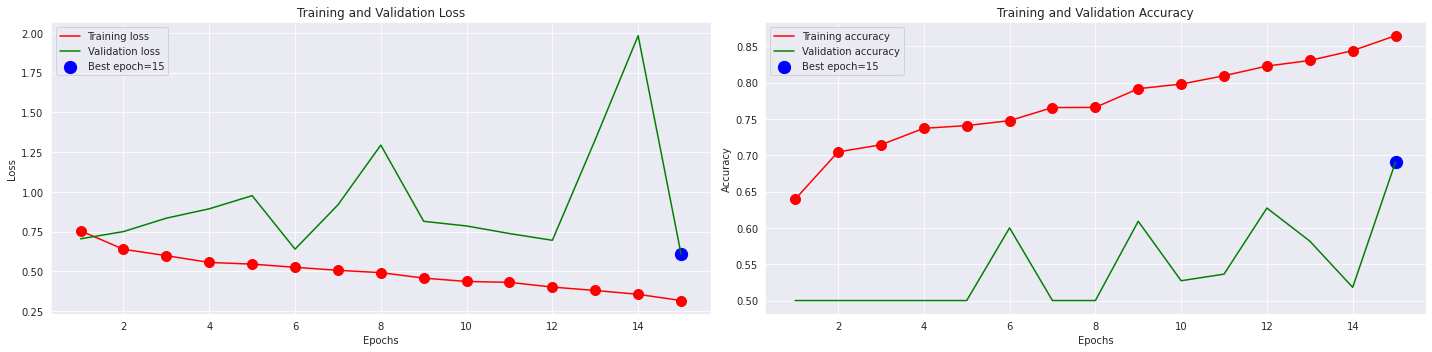

14

In [ ]:
tr_plot(second_history, 0) #second model 

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

test_classes = []
for _, label in data_test:
  test_classes.append(label.numpy())
test_classes = np.concatenate(test_classes)


#1ST MODEL 
# Evaluate the model on the test set
test_loss, test_accuracy = b_model_1.evaluate(data_test)

# Print the metrics
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Get the predicted labels for the test set
y_pred = b_model_1.predict(data_test)
y_pred = (y_pred > 0.5).astype(int)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(test_classes, y_pred))

# Print the precision, recall, and F1 score
print("Precision:", precision_score(test_classes, y_pred))
print("Recall:", recall_score(test_classes, y_pred))
print("F1 Score:", f1_score(test_classes, y_pred))




3/3 [==============================] - 2s 5ms/step - loss: 0.8546 - accuracy: 0.5000
Test Loss: 0.8545950055122375
Test Accuracy: 0.5
3/3 [==============================] - 2s 4ms/step
Confusion Matrix:
[[55  0]
 [55  0]]
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

#2ND MODEL 

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#The MapDataset object doesn't have a classes attribute. 
#You need to access the underlying tf.Tensor containing the labels and 
#then convert it to a NumPy array to get the classes. You can do it as follows:

test_classes = []
for _, label in data_test:
  test_classes.append(label.numpy())
test_classes = np.concatenate(test_classes)



test_loss_2, test_accuracy_2 = second_model.evaluate(data_test)

# Print the metrics
print("Test Loss:", test_loss_2)
print("Test Accuracy:", test_accuracy_2)

# Get the predicted labels for the test set
y_pred_2 = second_model.predict(data_test)
y_pred_2 = (y_pred_2 > 0.5).astype(int)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(test_classes, y_pred_2))

# Print the precision, recall, and F1 score
print("Precision:", precision_score(test_classes, y_pred_2))
print("Recall:", recall_score(test_classes, y_pred_2))
print("F1 Score:", f1_score(test_classes, y_pred_2))





3/3 [==============================] - 2s 5ms/step - loss: 0.6243 - accuracy: 0.6727
Test Loss: 0.6242944598197937
Test Accuracy: 0.6727272868156433
3/3 [==============================] - 2s 4ms/step
Confusion Matrix:
[[21 34]
 [24 31]]
Precision: 0.47692307692307695
Recall: 0.5636363636363636
F1 Score: 0.5166666666666667
